# FNO + convection problem with pereodic boundary conditions

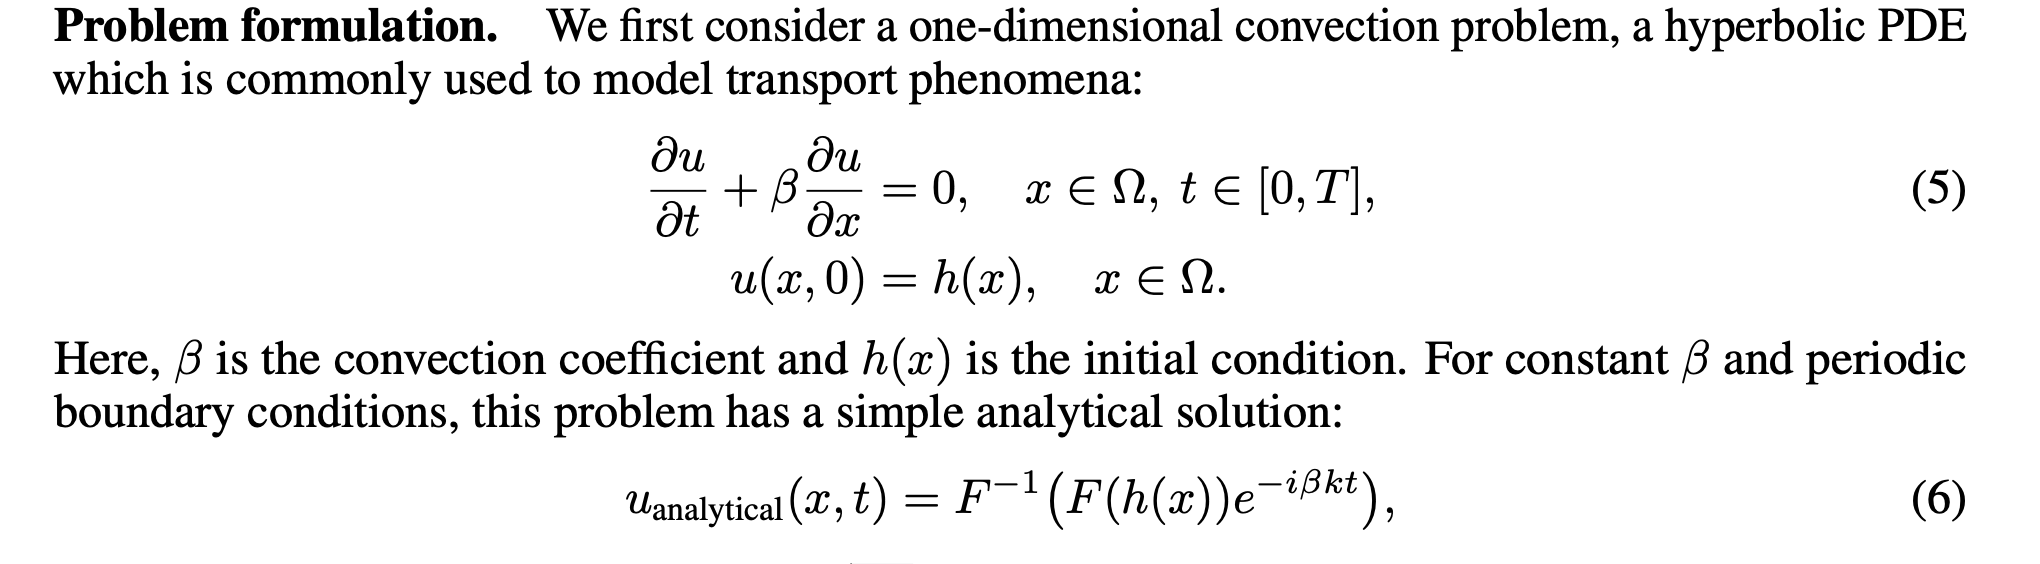

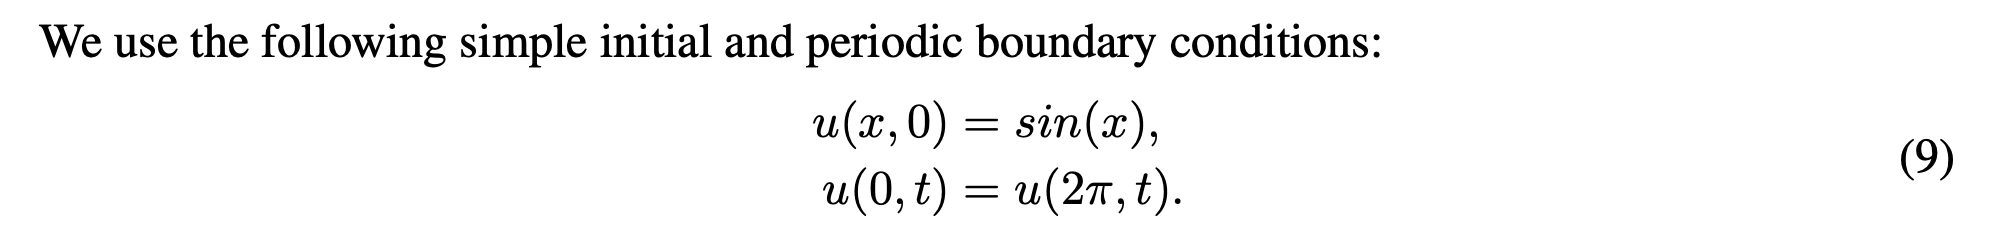

## Analytical solution

In [4]:
import numpy as np
import matplotlib.pyplot as plt

rate = 5000
x = np.linspace(0, 2*np.pi, rate)
t = np.linspace(0, 1, rate)

x.shape, t.shape

((5000,), (5000,))

In [5]:
def h(x):
    return np.sin(x)

def analytical(x, t, beta):
    fft = np.fft.fft(h(x))
    freq = np.fft.fftfreq(len(fft), 1/len(t))
    exp = np.exp(-1j*beta*freq*t) 
    
    return np.fft.ifft(fft*exp)

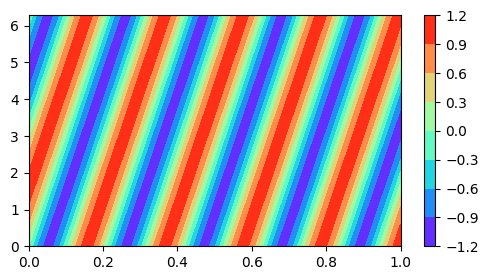

In [6]:
grid = np.meshgrid(x, t)
fig = plt.figure(figsize=(6,3))
plt.contourf(t, x, analytical(x=grid[0], t=grid[1], beta=30).real.T, cmap='rainbow')
plt.colorbar()
plt.show()

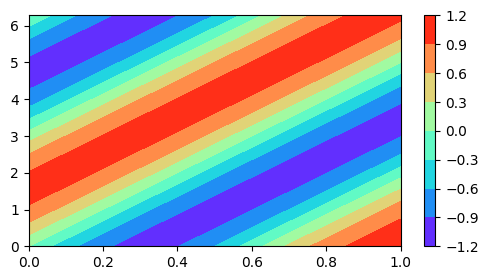

In [13]:
fig = plt.figure(figsize=(6,3))
plt.contourf(t, x, analytical(x=grid[0], t=grid[1], beta=5).real.T, cmap='rainbow')
plt.colorbar()
plt.show()

## Dataset generation for FNO

In [ ]:
BATCH_SIZE = 64
LEARNING_RATE = 3e-4
STEPS = 300
PRINT_EVERY = 30
SEED = 42

key = jax.random.PRNGKey(SEED)

### Подход 0: FNO overfit

Сперва, проверим, может ли нейросеть из граничных условий воспроизвести решение при константных $\beta$ и гран. условиях.

### Подход 1: positional embedding

Обычно, при обучении FNO задача ставится следующим образом – хотим решать уравнение при различных начальных/граничных условиях. В таком случае, датасет формируется из пар (condition, solution), где начальное условие сэмплируется из некоторого распределения. 

Нам же, хочется решать задачу с одним начальным условием, но для произвольного $\beta$. Тут возникает проблема – нейросеть из чего-то должна извлекать признаки. В нашем случае, к начальному условию нужно добавить инофрмацию о $\beta$.

Первая идея – применить подход, похожий на positional encoding в NLP. Здесь, очевидно, используется тот факт, что граничное условие у нас одно и фиксированное. Можно предположить, что модель на основе тренировочного набора научится отличать граничное условие от позиционного эмбеддинга.


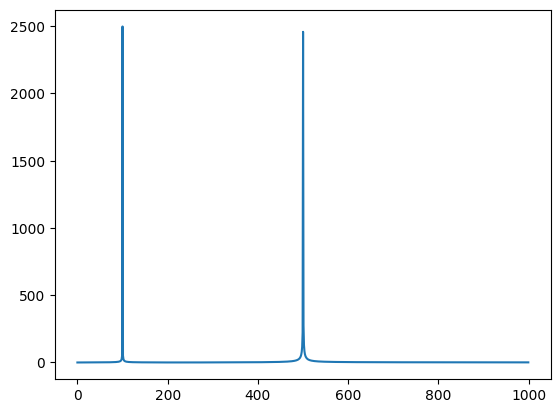

In [26]:
fft = np.fft.rfft(np.sin(100*x)+np.sin(500*x))
freq = np.fft.rfftfreq(len(x), 1/rate)
plt.plot(freq[:1000], abs(fft)[:1000])

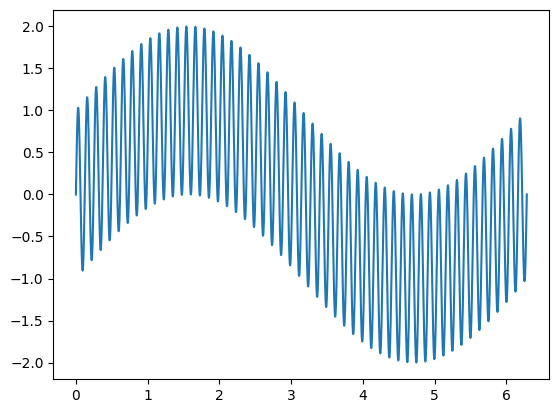

In [31]:
plt.plot(x, np.sin(x)+np.sin(50*x))

### Подход 2 – разные граничные условия

Здесь попробуем решить задачу с константным коэффициентом $\beta$, но с различными граничными условиями, как обычно это делается при работе с FNO. Здесь сперва нужно понять, каким образом генерировать синтетические данные, как должны выглядеть граничные условия и чем это все дело решать. 